In [1]:
#Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Load the dataset
df = pd.read_csv('kingcountysales_2000_2023.csv')

In [3]:
#Drop unwanted columns
df = df.drop(columns=['Unnamed: 0', 'sale_id', 'pinx', 'area', 'sale_nbr', 'sale_warning', 'join_status', 'join_year', 'submarket', 'view_otherwater', 'view_other',
'bath_3qtr', 'bath_half', 'garb_sqft', 'condition', 'year_reno', 'fbsmt_grade', 'grade', 'gara_sqft', 'sqft_fbsmt', 'sqft_1'])


In [4]:
# Filter the data for 2020-2023
df = df[(df['sale_date'] >= '2020-01-01') & (df['sale_date'] <= '2023-12-31')]


In [5]:
# Filter out single family homes
single_family_zones = ['R-1', 'R-4', 'R-6', 'R-8', 'R-12', 'R-18', 'R-24', 'R-48', 'RA-2.5', 'RA-5', 'RA-10']
df = df[df['zoning'].isin(single_family_zones)]
df

,sale_date,sale_price,latitude,longitude,city,zoning,subdivision,present_use,land_val,imp_val,...,greenbelt,noise_traffic,view_rainier,view_olympics,view_cascades,view_territorial,view_skyline,view_sound,view_lakewash,view_lakesamm
5384,2020-01-05,411900,47.468289,-122.348669,BURIEN,R-6,DASHLEYS ADD NO. 02,2,50000,42000,...,0,0,0,0,0,0,0,0,0,0
5392,2020-01-16,380600,47.769703,-122.116000,WOODINVILLE,R-1,NaN,2,147000,45000,...,0,0,0,0,0,0,0,0,0,0
5399,2020-02-24,562650,47.480198,-122.347541,BURIEN,R-6,LINDE TERRACE NO. 04,2,45000,85000,...,0,0,0,0,0,0,0,0,0,0
5425,2020-05-06,500500,47.462334,-122.358717,BURIEN,R-6,LYNMAR NO. 02,2,60000,77000,...,0,0,0,0,0,0,0,0,0,0
5455,2020-07-18,588000,47.459764,-122.354998,BURIEN,R-6,LAKE BURIEN WATERFRONT TRS,2,60000,72300,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575268,2023-10-25,1295000,47.525233,-122.201351,RENTON,R-6,HILLMANS LAKE WASH GARDEN OF EDEN NO. 02,2,579000,493000,...,0,0,0,0,0,3,0,0,2,0
575269,2023-10-28,500000,47.451499,-122.174445,RENTON,R-6,CASCADE VISTA NO. 03,2,220000,338000,...,0,0,0,0,0,0,0,0,0,0
575273,2023-10-27,650000,47.504205,-122.191322,RENTON,R-8,HILLMANS LAKE WASH GARDEN OF EDEN NO. 04,2,357000,204000,...,0,1,0,0,0,0,0,0,0,0
575288,2023-11-02,1050000,47.519696,-122.204428,RENTON,R-8,HILLMANS LAKE WASH GARDEN OF EDEN NO. 01,2,476000,360000,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#Extract Waterfront sales
df['wfnt'] = df['wfnt'].astype(bool)
# Filter for waterfront sales
waterfront_sales = df[df['wfnt'] == True]
# Ensure sale_date is datetime
waterfront_sales['sale_date'] = pd.to_datetime(waterfront_sales['sale_date'])
# Extract year from sale_date
waterfront_sales['sale_year'] = waterfront_sales['sale_date'].dt.year
#Calculate the average sale price for waterfront properties per year
average_waterfront_price = waterfront_sales.groupby('sale_year')['sale_price'].mean().reset_index()

C:\Users\count\AppData\Local\Temp\ipykernel_27544\2548033040.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  waterfront_sales['sale_date'] = pd.to_datetime(waterfront_sales['sale_date'])
C:\Users\count\AppData\Local\Temp\ipykernel_27544\2548033040.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  waterfront_sales['sale_year'] = waterfront_sales['sale_date'].dt.year


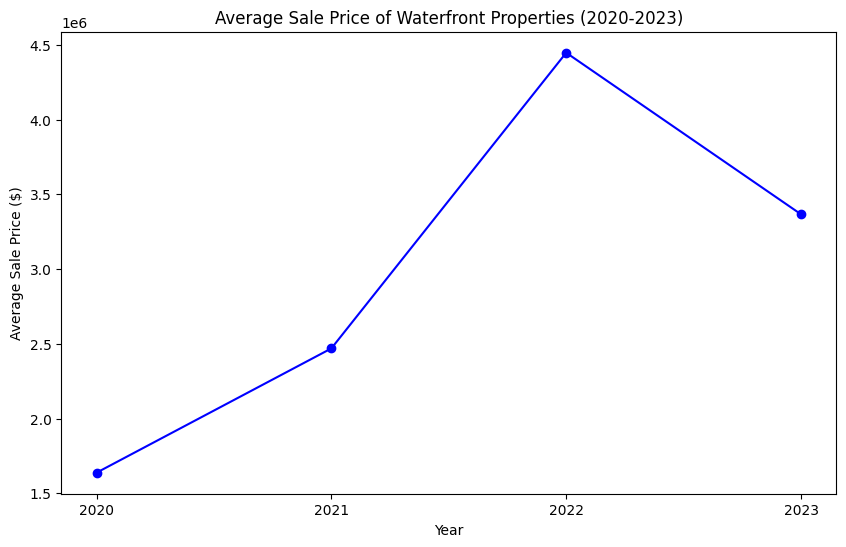

In [7]:
# Plot the average sale price for waterfront properties
plt.figure(figsize=(10, 6))
plt.plot(average_waterfront_price['sale_year'], average_waterfront_price['sale_price'], marker='o', linestyle='-', color='blue')
plt.title('Average Sale Price of Waterfront Properties (2020-2023)')
plt.xlabel('Year')
plt.ylabel('Average Sale Price ($)')
plt.xticks(average_waterfront_price['sale_year'])
plt.savefig("Output/wfnt_avg_price_per_year.png", dpi=300, bbox_inches="tight")
plt.show()

In [8]:
#Extract Greenbelt sales
df['greenbelt'] = df['greenbelt'].astype(bool)
# Filter for greenbelt sales
greenbelt_sales = df[df['greenbelt'] == True]
# Ensure sale_date is datetime
greenbelt_sales['sale_date'] = pd.to_datetime(greenbelt_sales['sale_date'])
# Extract year from sale_date
greenbelt_sales['sale_year'] = greenbelt_sales['sale_date'].dt.year
# Calculate the average sale price for greenbelt properties per year
average_greenbelt_price = greenbelt_sales.groupby('sale_year')['sale_price'].mean().reset_index()

C:\Users\count\AppData\Local\Temp\ipykernel_27544\4239436280.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  greenbelt_sales['sale_date'] = pd.to_datetime(greenbelt_sales['sale_date'])
C:\Users\count\AppData\Local\Temp\ipykernel_27544\4239436280.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  greenbelt_sales['sale_year'] = greenbelt_sales['sale_date'].dt.year


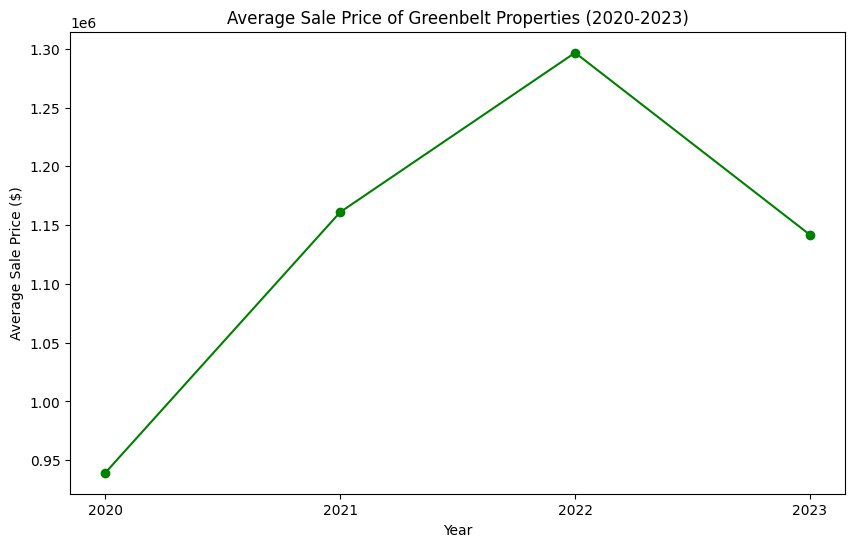

In [9]:
#Plot Greenbelt sales per year
plt.figure(figsize=(10, 6))
plt.plot(average_greenbelt_price['sale_year'], average_greenbelt_price['sale_price'], marker='o', linestyle='-', color='green')
plt.title('Average Sale Price of Greenbelt Properties (2020-2023)')
plt.xlabel('Year')
plt.ylabel('Average Sale Price ($)')
plt.xticks(average_greenbelt_price['sale_year'])
plt.savefig("Output/greenbelt_avg_price_per_year.png", dpi=300, bbox_inches="tight")
plt.show()

In [10]:
#Extract Rainier View sales
df['view_rainier'] = df['view_rainier'].astype(bool)
# Filter for Rainier View sales
rainier_view_sales = df[df['view_rainier'] == True]
# Ensure sale_date is datetime
rainier_view_sales['sale_date'] = pd.to_datetime(rainier_view_sales['sale_date'])
# Extract year from sale_date
rainier_view_sales['sale_year'] = rainier_view_sales['sale_date'].dt.year
# Calculate the average sale price for Rainier View properties per year
average_rainier_view_price = rainier_view_sales.groupby('sale_year')['sale_price'].mean().reset_index()

C:\Users\count\AppData\Local\Temp\ipykernel_27544\3080972248.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rainier_view_sales['sale_date'] = pd.to_datetime(rainier_view_sales['sale_date'])
C:\Users\count\AppData\Local\Temp\ipykernel_27544\3080972248.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rainier_view_sales['sale_year'] = rainier_view_sales['sale_date'].dt.year


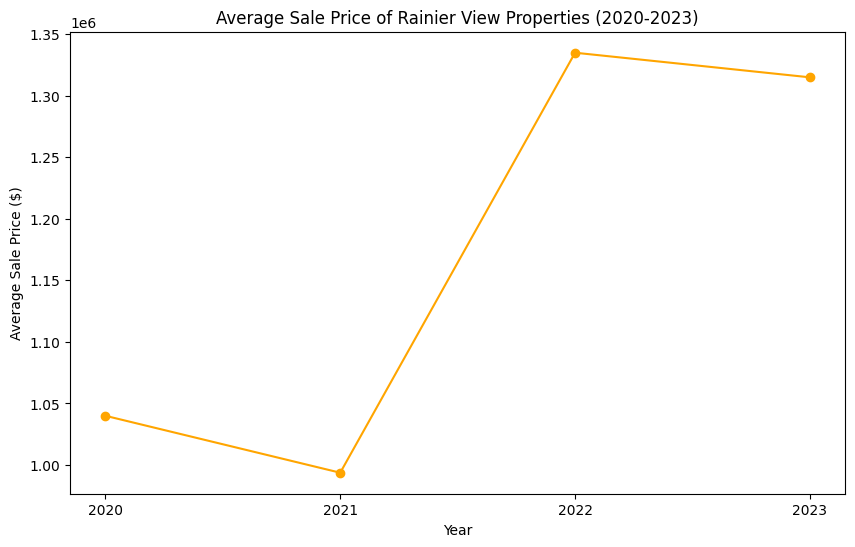

In [11]:
# Plot the average sale price for Rainier View properties
plt.figure(figsize=(10, 6))
plt.plot(average_rainier_view_price['sale_year'], average_rainier_view_price['sale_price'], marker='o', linestyle='-', color='orange')
plt.title('Average Sale Price of Rainier View Properties (2020-2023)')
plt.xlabel('Year')
plt.ylabel('Average Sale Price ($)')
plt.xticks(average_rainier_view_price['sale_year'])
plt.savefig("Output/rainier_view_avg_price_per_year.png", dpi=300, bbox_inches="tight")
plt.show()

In [12]:
# Extract Lake View sales
df['lake_view'] = df[['view_lakewash', 'view_lakesamm']].sum(axis=1) > 0
# Filter for Lake View sales
lake_view_sales = df[df['lake_view'] == True]
# Ensure sale_date is datetime
lake_view_sales['sale_date'] = pd.to_datetime(lake_view_sales['sale_date'])
# Extract year from sale_date
lake_view_sales['sale_year'] = lake_view_sales['sale_date'].dt.year
# Calculate the average sale price for Lake View properties per year
average_lake_view_price = lake_view_sales.groupby('sale_year')['sale_price'].mean().reset_index()

C:\Users\count\AppData\Local\Temp\ipykernel_27544\2133550866.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lake_view_sales['sale_date'] = pd.to_datetime(lake_view_sales['sale_date'])
C:\Users\count\AppData\Local\Temp\ipykernel_27544\2133550866.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lake_view_sales['sale_year'] = lake_view_sales['sale_date'].dt.year


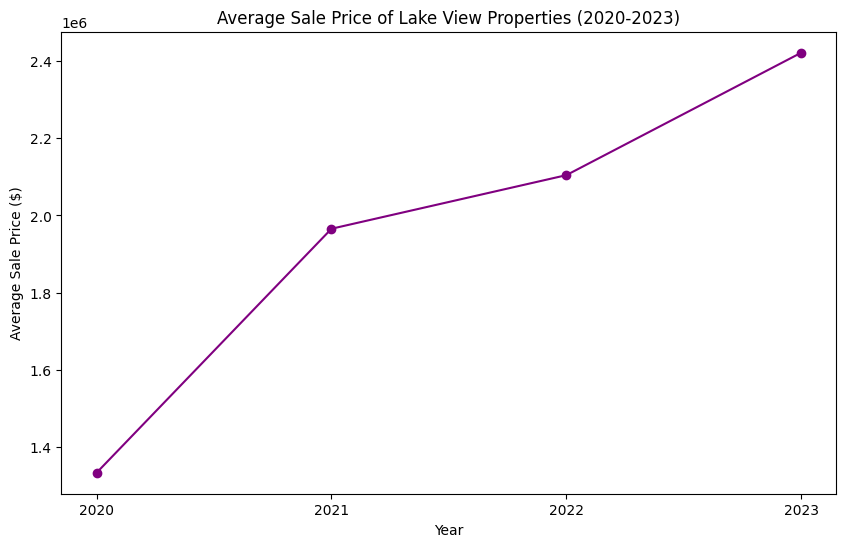

In [13]:
#Plot Lake View sales per year
plt.figure(figsize=(10, 6))
plt.plot(average_lake_view_price['sale_year'], average_lake_view_price['sale_price'], marker='o', linestyle='-', color='purple')
plt.title('Average Sale Price of Lake View Properties (2020-2023)')
plt.xlabel('Year')
plt.ylabel('Average Sale Price ($)')
plt.xticks(average_lake_view_price['sale_year'])
plt.savefig("Output/lake_view_avg_price_per_year.png", dpi=300, bbox_inches="tight")
plt.show()